# Kaggle - Titanic: Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # Used in distribution graphics
import matplotlib.pyplot as plt # Used in distribution graphics

%matplotlib inline

For this competition we will work with two files:
- train.csv --> The training set
 + PassengerId - a unique identifier for each passenger
 + Survived - 0=No 1=Yes
 + Pclass - 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
 + Name - name of the passenger
 + Sex - male/female
 + Age - age of the passenger in years. Fractional if less than 1. And x.5 if estimated
 + SibSp - number of siblings/spouse
 + Parch - number of parents/children
 + Ticket - ticket number
 + Fare - price of the ticket
 + Cabin - cabin number
 + Embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- test.csv --> The test set
 + PassengerId - a unique identifier for each passenger
 + Pclass - 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
 + Name - name of the passenger
 + Sex - male/female
 + Age - age of the passenger in years. Fractional if less than 1. And x.5 if estimated
 + SibSp - number of siblings/spouse
 + Parch - number of parents/children
 + Ticket - ticket number
 + Fare - price of the ticket
 + Cabin - cabin number
 + Embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
train_df = pd.read_csv("./train.csv")

In [3]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.2250,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
387,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C


Size of the data

In [4]:
train_df.shape

(891, 12)

Statistical description of the data (only numerical fields)

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Age is null in some rows

Statistical description of the data (categorical fields)

In [6]:
train_df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strom, Miss. Telma Matilda",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


- 2 rows without Embarked field

Missing values in the training dataset

In [7]:
aux = train_df.isnull().sum()
aux[aux>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

Open the test file and keep a backup of both training and test datasets before cleaning them

In [8]:
test_df = pd.read_csv("./test.csv")
train_df_orig = train_df.copy()
test_df_orig = test_df.copy()

Missing values in the test dataset

In [9]:
aux = test_df.isnull().sum()
aux[aux>0]

Age       86
Fare       1
Cabin    327
dtype: int64

Remove unuseful columns in training and test dataset. Columns as Name, Ticket and Cabin are unique (or almost unique) per user, so they don't give information.

In [10]:
train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [11]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [12]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [13]:
train_df.shape

(891, 9)

In [14]:
test_df.shape

(418, 8)

Remove 2 rows in training dataset with embarked field empty.

In [15]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [16]:
train_df=train_df[train_df["Embarked"].isnull()==False]

In [17]:
train_df.shape

(889, 9)

In [18]:
aux = train_df.isnull().sum()
aux[aux>0]

Age    177
dtype: int64

In [19]:
aux = test_df.isnull().sum()
aux[aux>0]

Age     86
Fare     1
dtype: int64

There are a lot of rows with Age field empty. If we just remove them, we will lose a lot of data, so we need to think in other solution.
Our first approach is to fill this empty fields with the mean.

In [20]:
train_df["Age"].mean()

29.64209269662921

In [21]:
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].mean())

In [22]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.642093,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


In [23]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
train_df[train_df["Age"].isnull()].head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [25]:
test_df.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


In [26]:
test_df["Age"]=test_df["Age"].fillna(train_df["Age"].mean())

In [27]:
test_df.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.500000,0,0,7.8292,Q
1,893,3,female,47.000000,1,0,7.0000,S
2,894,2,male,62.000000,0,0,9.6875,Q
3,895,3,male,27.000000,0,0,8.6625,S
4,896,3,female,22.000000,1,1,12.2875,S
5,897,3,male,14.000000,0,0,9.2250,S
6,898,3,female,30.000000,0,0,7.6292,Q
7,899,2,male,26.000000,1,1,29.0000,S
8,900,3,female,18.000000,0,0,7.2292,C
9,901,3,male,21.000000,2,0,24.1500,S


In [28]:
train_df["Fare"].mean()

32.09668087739029

In [29]:
test_df[test_df["Fare"].isnull()].head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [30]:
test_df["Fare"]=test_df["Fare"].fillna(train_df["Fare"].mean())

In [31]:
aux = test_df.isnull().sum()
aux[aux>0]

Series([], dtype: int64)

In [32]:
test_df[test_df["PassengerId"]==1044]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,32.096681,S


Convert categorical fields (Sex and Embarked) in numerical ones. As the ID is numeric we don't need to remove it.

In [33]:
train_df_num = pd.get_dummies(train_df)

In [34]:
train_df_num.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,6,0,3,29.642093,0,0,8.4583,0,1,0,1,0
6,7,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,8,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,9,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,10,1,2,14.000000,1,0,30.0708,1,0,1,0,0


In [35]:
test_df_num = pd.get_dummies(test_df)

In [36]:
test_df_num.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
5,897,3,14.0,0,0,9.2250,0,1,0,0,1
6,898,3,30.0,0,0,7.6292,1,0,0,1,0
7,899,2,26.0,1,1,29.0000,0,1,0,0,1
8,900,3,18.0,0,0,7.2292,1,0,1,0,0
9,901,3,21.0,2,0,24.1500,0,1,0,0,1


Check that both training and test dataframes have the same columns. Depending on the values of the categorical fields there could be differences.

In [37]:
np.array(train_df_num.columns)

array(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

In [38]:
np.array(test_df_num.columns)

array(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [39]:
np.array(train_df_num.columns.drop("Survived")) == np.array(test_df_num.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Keep a backup of the dataset cleaned and converted to numeric.

In [40]:
train_df_num.to_csv("train_clean_numeric.csv", index=None)
test_df_num.to_csv("test_clean_numeric.csv", index=None)

Check that there are no atypical values (negative, huge values,...)

In [41]:
print(train_df_num.shape)
train_df_num.describe()

(889, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.350956,0.649044,0.188976,0.086614,0.724409
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504,0.477538,0.477538,0.391710,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
train_df_num.describe().loc[["min","max"]]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
min,1.0,0.0,1.0,0.42,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
max,891.0,1.0,3.0,80.00,8.0,6.0,512.3292,1.0,1.0,1.0,1.0,1.0


In [43]:
print(test_df_num.shape)
test_df_num.describe()

(418, 11)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.142871,0.447368,0.392344,35.618742,0.363636,0.636364,0.244019,0.110048,0.645933
std,120.810458,0.841838,12.637111,0.896760,0.981429,55.840767,0.481622,0.481622,0.430019,0.313324,0.478803
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,29.642093,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
test_df_num.describe().loc[["min","max"]]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
min,892.0,1.0,0.17,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
max,1309.0,3.0,76.00,8.0,9.0,512.3292,1.0,1.0,1.0,1.0,1.0


The datasets are very simple, so there is no need to create new synthetic variables.

## Exploratory data analysis (EDA)

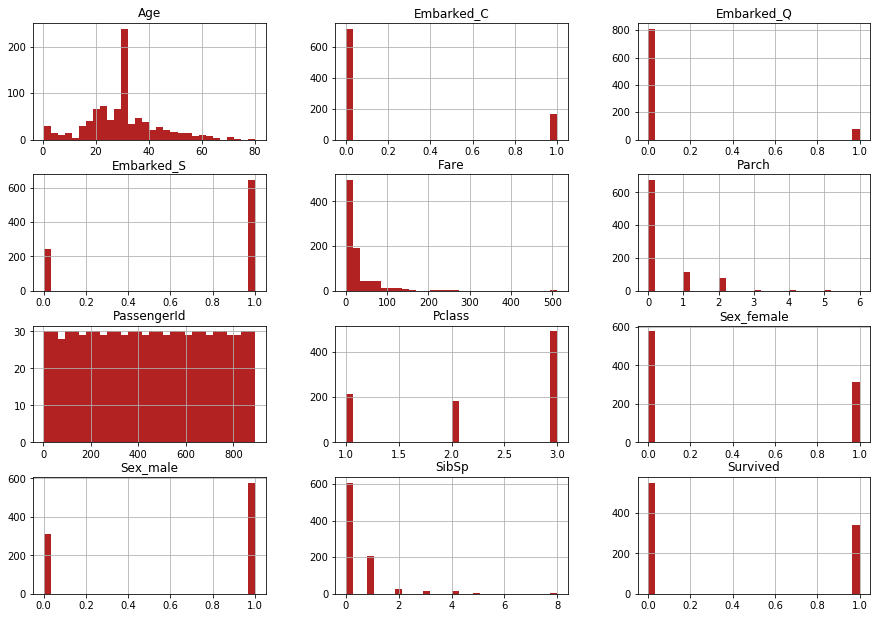

In [45]:
# bins --> max number of blocks in the graph
train_df_num.hist(color='firebrick', bins=30, layout=(11,3), figsize=(15,30));

There is a peak in the age because we have filled the empty fields with the same value (the average).

Distribution graphics for each variable.

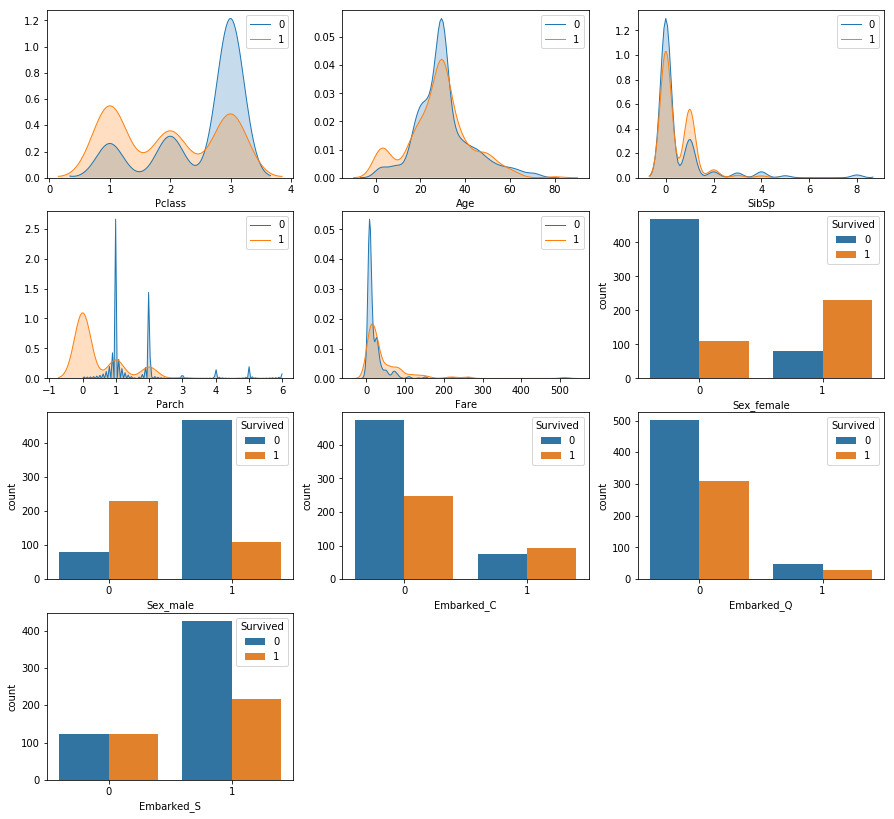

In [46]:
clases = np.unique(train_df_num["Survived"])
cols = list(train_df_num.columns)
cols.remove("Survived")
cols.remove("PassengerId")

plt.figure(figsize=(15,40))

for i,col in enumerate(cols):
    plt.subplot(11,3,i+1)
    if len(np.unique(train_df_num[col]))>2:
        for c in clases:
            sns.distplot(train_df_num[train_df_num["Survived"]==c][col], hist=False, kde=True,
                         kde_kws = {'shade': True, 'linewidth': 1}, 
                         label = c)
    else:
        sns.countplot(x=col, hue="Survived", data=train_df_num)

- There is a peak of Survived=0 in Pclass=3. It was less likely to survive in third class.
- There is a peak of Survived=1 in Parch=0
- There is a peak of Survived=0 in Parch=1
- There is a peak of Survived=0 in Sex_male=1. It was more likely to survive if you were a woman.
- There is a peak of Survived=0 in Embarked_S=1. It was less likely to survive if you embarked in Southamptom.

Calculate the correlation between parameters and generate a heatmap

In [47]:
corr = train_df_num.corr()
corr.shape

(12, 12)

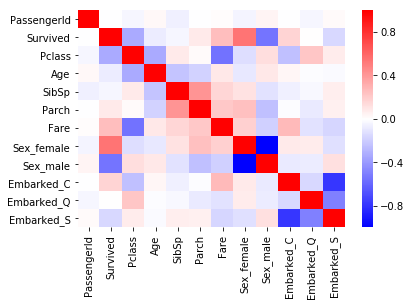

In [48]:
sns.heatmap(corr, cmap="bwr", vmax=1, vmin=-1);

- As expected, Fare and Pclass are related (lower Pclass, higher Fare).
- As we saw in the distribution graphics, Sex_male and Sex_female are related with Survived.
- As we saw in the distribution graphics, Pclass (and therefore Fare) are related with Survived.
- Parch and SibSp are also related. If you travel with your children, it's very likely that you also travel with your siblings/spouse (and vice versa)

Generate a hierarchically-clustered heatmap

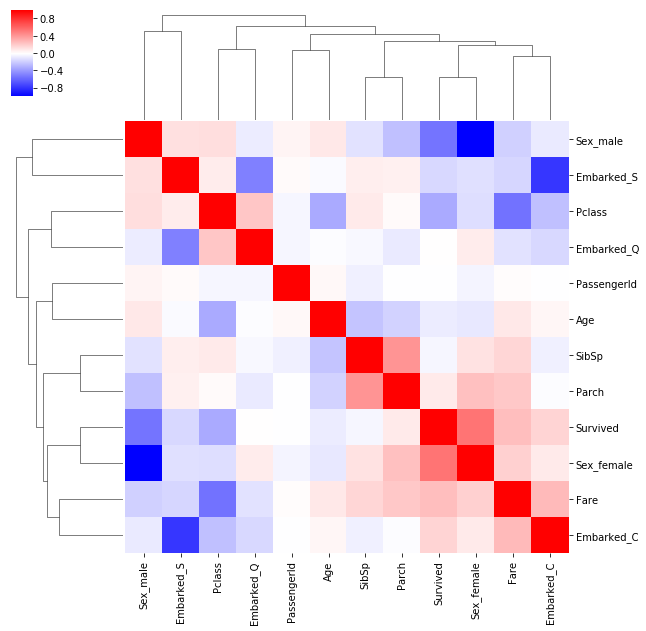

In [49]:
# Variables ordered by their equality in behaviour
sns.clustermap(corr, cmap="bwr", vmax=1, vmin=-1);

Variables more related are
- Sex_Female and Survived
- SibSp and Parch

In [50]:
# Ranking with variables sorted from more correlated with the target to less correlated (in absulute value)
corr["Survived"].abs().sort_values()[::-1] # Sort descendant with stride -1 [begin:end:step]

Survived       1.000000
Sex_male       0.541585
Sex_female     0.541585
Pclass         0.335549
Fare           0.255290
Embarked_C     0.169966
Embarked_S     0.151777
Parch          0.083151
Age            0.074513
SibSp          0.034040
PassengerId    0.005028
Embarked_Q     0.004536
Name: Survived, dtype: float64

As we saw in the correlation matrix Sex and Pclass are the most related variables to Survived.

### Defining matrix "X" and target "y"

For the training and test datasets we remove the ID and the target variable.

In [51]:
# Convert the training dataframe into an array
X      = train_df_num.drop(["PassengerId","Survived"], axis=1).values
y      = train_df_num["Survived"].values
IDs_train = train_df_num["PassengerId"].values

# Test:
X_test = test_df_num.drop(["PassengerId"], axis=1).values
IDs_test = test_df_num["PassengerId"].values

### Training-validation split

In [52]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3,
                                          random_state=1)
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((622, 10), (267, 10), (622,), (267,))

As we can see, data is not standardized (stardard deviation!=0)

In [53]:
X_tr.std(axis=0)

array([ 0.82508471, 13.33586095,  1.10209795,  0.83750794, 40.13830573,
        0.4755827 ,  0.4755827 ,  0.38689569,  0.27435492,  0.44147863])

### Data standardization

There are models (like neuronal networks) that need standardized data.
We use Standar Scaler --> X_standardized = (X - X_mean)/X_std

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_tr)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
X_tr_sc = sc.transform(X_tr) # Training
X_te_sc = sc.transform(X_te) # Validation
X_test_sc = sc.transform(X_test) # Test

categorical = []
for i in range(X_tr.shape[1]):
    if len(np.unique(X_tr[:,i]))<=2: # Columns with 2 or less different values
        categorical.append(i)

# Categorical variables are not standardized. Values recovered from pre-standardized data
X_tr_sc[:,categorical]   = X_tr[:,categorical]
X_te_sc[:,categorical]   = X_te[:,categorical]
X_test_sc[:,categorical] = X_test[:,categorical]

X_tr_sc.std(axis=0) # Non -standardized variables has standard deviation = 1

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.4755827 , 0.4755827 , 0.38689569, 0.27435492, 0.44147863])

In [56]:
X_tr_sc

array([[ 0.81254446, -0.66294243, -0.45659774, ...,  0.        ,
         0.        ,  1.        ],
       [-0.39945231, -0.13804194,  0.45076263, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81254446, -0.01490833, -0.45659774, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.81254446, -0.28801351,  0.45076263, ...,  1.        ,
         0.        ,  0.        ],
       [-0.39945231,  1.06173062,  0.45076263, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81254446, -0.66294243, -0.45659774, ...,  0.        ,
         0.        ,  1.        ]])

In [57]:
X_tr

array([[ 3.       , 21.       ,  0.       , ...,  0.       ,  0.       ,
         1.       ],
       [ 2.       , 28.       ,  1.       , ...,  1.       ,  0.       ,
         0.       ],
       [ 3.       , 29.6420927,  0.       , ...,  0.       ,  0.       ,
         1.       ],
       ...,
       [ 3.       , 26.       ,  1.       , ...,  1.       ,  0.       ,
         0.       ],
       [ 2.       , 44.       ,  1.       , ...,  0.       ,  0.       ,
         1.       ],
       [ 3.       , 21.       ,  0.       , ...,  0.       ,  0.       ,
         1.       ]])

In [58]:
X_tr.mean(axis=0)

array([ 2.32958199, 29.84090811,  0.50321543,  0.39228296, 29.65963183,
        0.34565916,  0.65434084,  0.18327974,  0.08199357,  0.73472669])

In [59]:
X_tr.std(axis=0)

array([ 0.82508471, 13.33586095,  1.10209795,  0.83750794, 40.13830573,
        0.4755827 ,  0.4755827 ,  0.38689569,  0.27435492,  0.44147863])

### PCA visualization

We use this kind of visualization to see if the points cloud of target=0 and target=1 are overlapped (complex problem) or not (simple problem). We use it only with numerical variables.

In [60]:
from sklearn.decomposition import PCA
pca = PCA() # You can use the parameter n_components to keep only the first n components.
num_columns=range(1,5) # Numeric columns (number 1,2,3 and 4). Categorical converted into numerical (0 or 1) are not included.
pca.fit(X_tr_sc[:,num_columns])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
X_tr_pca = pca.transform(X_tr_sc[:,num_columns]) # Sólo debería ser transform y con las numéricas
X_te_pca = pca.transform(X_te_sc[:,num_columns])

X_tr_sc.shape, X_tr_pca.shape, X_te_sc.shape, X_te_pca.shape

((622, 10), (622, 4), (267, 10), (267, 4))

In [62]:
X_tr_pca

array([[-0.56669234, -0.84385609,  0.34253538,  0.10008853],
       [-0.02042875, -0.23733211,  0.0950377 , -0.62907911],
       [-0.77557612, -0.34109026,  0.00309374,  0.00881228],
       ...,
       [-0.07166466, -0.5033339 ,  0.01987623, -0.62463112],
       [-0.38865196,  0.72130039, -0.50483964, -0.79496936],
       [-0.56538444, -0.84189051,  0.34455439,  0.10030756]])

In [63]:
X_tr[:,num_columns]

array([[21.       ,  0.       ,  0.       ,  7.925    ],
       [28.       ,  1.       ,  0.       , 24.       ],
       [29.6420927,  0.       ,  0.       ,  8.05     ],
       ...,
       [26.       ,  1.       ,  0.       , 14.4542   ],
       [44.       ,  1.       ,  0.       , 26.       ],
       [21.       ,  0.       ,  0.       ,  8.05     ]])

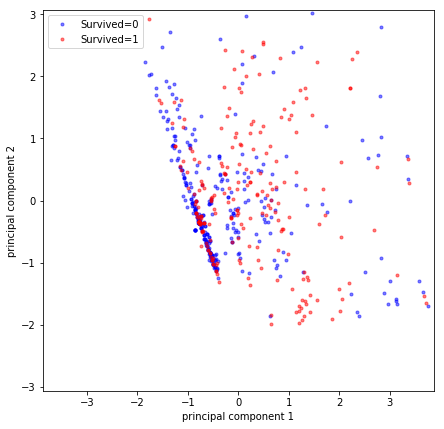

In [64]:
# You can change which PCA components you want to display (0 and 1, 1 and 2,...)
comp_horiz=0
comp_vert =1

plt.figure(figsize=(7,7))
plt.plot(X_tr_pca[y_tr==0,comp_horiz],
         X_tr_pca[y_tr==0,comp_vert], '.', label="Survived=0",
         alpha=0.5, color="blue")
plt.plot(X_tr_pca[y_tr==1,comp_horiz],
         X_tr_pca[y_tr==1,comp_vert], '.', label="Survived=1",
         alpha=0.5, color="red")
m_horiz   = X_tr_pca[:,comp_horiz].mean()
std_horiz = X_tr_pca[:,comp_horiz].std()
m_vert    = X_tr_pca[:,comp_vert].mean()
std_vert  = X_tr_pca[:,comp_vert].std()
plt.axis([m_horiz-3*std_horiz, m_horiz+3*std_horiz,
          m_vert-3*std_vert,   m_vert+3*std_vert])
plt.xlabel('principal component '+str(comp_horiz+1))
plt.ylabel('principal component '+str(comp_vert+1))
plt.legend();

## Dummy classifier (baseline)

The dummy classifier is based on simple rules. Real classifiers should be better than these ones. There are several strategies to follow:
    - Most frequent: Just take the most frequent label in the training dataset.
    - Stratified: Generates predictions by respecting the training dataset’s class distribution.

In [65]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_tr,y_tr)

print("Scoring training:", clf_dummy.score(X_tr, y_tr))
print("Scoring test    :", clf_dummy.score(X_te, y_te))

Scoring training: 0.6157556270096463
Scoring test    : 0.6217228464419475


In [66]:
clf_dummy = DummyClassifier(strategy='stratified')
clf_dummy.fit(X_tr,y_tr)

print("Scoring training:", clf_dummy.score(X_tr, y_tr))
print("Scoring test    :", clf_dummy.score(X_te, y_te))

Scoring training: 0.5289389067524116
Scoring test    : 0.5393258426966292


## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(X_tr_sc, y_tr)

print("Scoring training:", clf_lr.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_lr.score(X_te_sc, y_te))

Scoring training: 0.7845659163987139
Scoring test    : 0.8352059925093633


## Neural network

In [68]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron
from sklearn.metrics import log_loss # log-loss is based on how much the prediction varies from the actual label.

N_iters = 1000
architecture = (5,) # one single hidden layer with 5 neurons.

X_tr1_sc, X_tr2_sc, y_tr1, y_tr2 = train_test_split(X_tr_sc, y_tr,
                                                    test_size=0.3,
                                                    random_state=1)

# X_tr2, y_tr2 is the validation dataset to avoid overfitting in training.
clf_nn = MLPClassifier(verbose=True, max_iter=1, random_state=7,
                       hidden_layer_sizes=architecture,
                       early_stopping=False, warm_start=True)
# max_iter -> number of epochs (solver is 'adam')
# early_stopping -> finish if validation score is not improving
best_loss_in_val = 1e20
for i in range(N_iters):
    clf_nn.fit(X_tr1_sc, y_tr1)
    loss_val = log_loss(y_tr2, clf_nn.predict_proba(X_tr2_sc))
    if loss_val < best_loss_in_val:
        best_weights = clf_nn.coefs_.copy()
        best_loss_in_val = loss_val
        print("nnet improvement in validation")

clf_nn.coefs_ = best_weights
print("Scoring training:", clf_nn.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_nn.score(X_te_sc, y_te))

Iteration 1, loss = 1.03768748
nnet improvement in validation
Iteration 2, loss = 1.03013171
nnet improvement in validation
Iteration 3, loss = 1.02269768
nnet improvement in validation
Iteration 4, loss = 1.01556855
nnet improvement in validation
Iteration 5, loss = 1.00871051
nnet improvement in validation
Iteration 6, loss = 1.00204186
nnet improvement in validation
Iteration 7, loss = 0.99551659
nnet improvement in validation
Iteration 8, loss = 0.98913038
nnet improvement in validation
Iteration 9, loss = 0.98288115
nnet improvement in validation
Iteration 10, loss = 0.97676231
nnet improvement in validation
Iteration 11, loss = 0.97076680
nnet improvement in validation
Iteration 12, loss = 0.96488547
nnet improvement in validation
Iteration 13, loss = 0.95913296
nnet improvement in validation
Iteration 14, loss = 0.95350655
nnet improvement in validation
Iteration 15, loss = 0.94798627
nnet improvement in validation
Iteration 16, loss = 0.94258333
nnet improvement in validation
I

C:\Users\albher\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



nnet improvement in validation
Iteration 45, loss = 0.76089034
nnet improvement in validation
Iteration 46, loss = 0.75485404
nnet improvement in validation
Iteration 47, loss = 0.74891747
nnet improvement in validation
Iteration 48, loss = 0.74310107
nnet improvement in validation
Iteration 49, loss = 0.73740192
nnet improvement in validation
Iteration 50, loss = 0.73177450
nnet improvement in validation
Iteration 51, loss = 0.72619665
nnet improvement in validation
Iteration 52, loss = 0.72069834
nnet improvement in validation
Iteration 53, loss = 0.71523363
nnet improvement in validation
Iteration 54, loss = 0.70986301
nnet improvement in validation
Iteration 55, loss = 0.70452373
nnet improvement in validation
Iteration 56, loss = 0.69927864
nnet improvement in validation
Iteration 57, loss = 0.69413115
nnet improvement in validation
Iteration 58, loss = 0.68901659
nnet improvement in validation
Iteration 59, loss = 0.68391993
nnet improvement in validation
Iteration 60, loss = 0.

Iteration 177, loss = 0.46709500
nnet improvement in validation
Iteration 178, loss = 0.46688034
nnet improvement in validation
Iteration 179, loss = 0.46666964
nnet improvement in validation
Iteration 180, loss = 0.46646283
nnet improvement in validation
Iteration 181, loss = 0.46626014
nnet improvement in validation
Iteration 182, loss = 0.46606083
nnet improvement in validation
Iteration 183, loss = 0.46586533
nnet improvement in validation
Iteration 184, loss = 0.46567442
nnet improvement in validation
Iteration 185, loss = 0.46548764
nnet improvement in validation
Iteration 186, loss = 0.46530466
nnet improvement in validation
Iteration 187, loss = 0.46512498
nnet improvement in validation
Iteration 188, loss = 0.46494841
nnet improvement in validation
Iteration 189, loss = 0.46477614
nnet improvement in validation
Iteration 190, loss = 0.46460726
nnet improvement in validation
Iteration 191, loss = 0.46444144
nnet improvement in validation
Iteration 192, loss = 0.46427867
nnet im

Iteration 330, loss = 0.45299800
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 331, loss = 0.45295149
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 332, loss = 0.45290550
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 333, loss = 0.45286349
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 334, loss = 0.45281946
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 335, loss = 0.45277465
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 336, loss = 0.45273459
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 337, loss = 0.45269621
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 338, l

Iteration 431, loss = 0.44829507
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 432, loss = 0.44822938
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 433, loss = 0.44816473
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 434, loss = 0.44810783
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 435, loss = 0.44805732
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 436, loss = 0.44800394
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 437, loss = 0.44794204
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 438, loss = 0.44787608
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 439, l

Iteration 530, loss = 0.44295056
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 531, loss = 0.44289931
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 532, loss = 0.44284721
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 533, loss = 0.44279655
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 534, loss = 0.44274854
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 535, loss = 0.44269792
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 536, loss = 0.44264344
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 537, loss = 0.44259097
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 538, l

Iteration 631, loss = 0.43906820
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 632, loss = 0.43903636
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 633, loss = 0.43900563
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 634, loss = 0.43897767
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 635, loss = 0.43895289
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 636, loss = 0.43892279
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 637, loss = 0.43888907
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 638, loss = 0.43885652
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 639, l

Iteration 728, loss = 0.43677462
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 729, loss = 0.43674836
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 730, loss = 0.43672412
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 731, loss = 0.43669575
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 732, loss = 0.43666611
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 733, loss = 0.43663945
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 734, loss = 0.43661453
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 735, loss = 0.43658726
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 736, l

Iteration 823, loss = 0.43335435
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 824, loss = 0.43331987
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 825, loss = 0.43328296
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 826, loss = 0.43324818
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 827, loss = 0.43321756
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 828, loss = 0.43318860
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 829, loss = 0.43315843
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 830, loss = 0.43312399
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 831, l

Iteration 923, loss = 0.43079220
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 924, loss = 0.43076753
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 925, loss = 0.43074688
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 926, loss = 0.43072483
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 927, loss = 0.43069980
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 928, loss = 0.43067408
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 929, loss = 0.43065124
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 930, loss = 0.43063352
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 931, l

## SVM (Support Vector Machines)

Uses a hyperplane to separate the different classes. This hyperplane is the one that has the largest separation between the two classes.
If the two classes are not linearly separable, it adds dimensions by operating with the existing ones (kernel function), so that in this new space the two classes were separable.

In [69]:
from sklearn.svm import SVC

clf_svm = SVC(probability=True,gamma='scale') # Support Vector Classification
clf_svm.fit(X_tr_sc, y_tr)

print("Scoring training:", clf_svm.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_svm.score(X_te_sc, y_te))

Scoring training: 0.8279742765273312
Scoring test    : 0.8389513108614233


## Random Forest

Constructs a large number of decision trees at training time and outputs the most frequent class (mode) for classification problems.

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1001,
                                max_features=None, n_jobs=-1
#                               max_depth=15, 
                               )

clf_rf.fit(X_tr, y_tr)
print("Scoring training:", clf_rf.score(X_tr, y_tr))
print("Scoring test    :", clf_rf.score(X_te, y_te))

Scoring training: 0.9871382636655949
Scoring test    : 0.846441947565543


In [71]:
X_sc = sc.transform(X)
clf_rf.fit(X, y) # train again the model with all the data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1001, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
print("Scoring training (all data):", clf_rf.score(X, y))

Scoring training (all data): 0.9820022497187851


## Gradient Boosting

Combines weak prediction models into a single strong learner. Unlike Random Forest (bagging) it gives more weight to misclassified examples (it's more likely that these examples appear in the next iteration's dataset).

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_tr, y_tr)
print("Scoring training:", clf_gb.score(X_tr, y_tr))
print("Scoring test    :", clf_gb.score(X_te, y_te))

Scoring training: 0.8858520900321544
Scoring test    : 0.8352059925093633


In [74]:
clf_gb.fit(X, y) # train again the model with all the data

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [75]:
print("Scoring training (all data):", clf_gb.score(X, y))

Scoring training (all data): 0.8965129358830146


## Decision Trees

Combines weak prediction models into a single strong learner. Unlike Random Forest (bagging) it gives more weight to misclassified examples (it's more likely that these examples appear in the next iteration's dataset).

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_tr, y_tr)
print("Scoring training:", clf_dt.score(X_tr, y_tr))
print("Scoring test    :", clf_dt.score(X_te, y_te))

Scoring training: 0.9871382636655949
Scoring test    : 0.7602996254681648


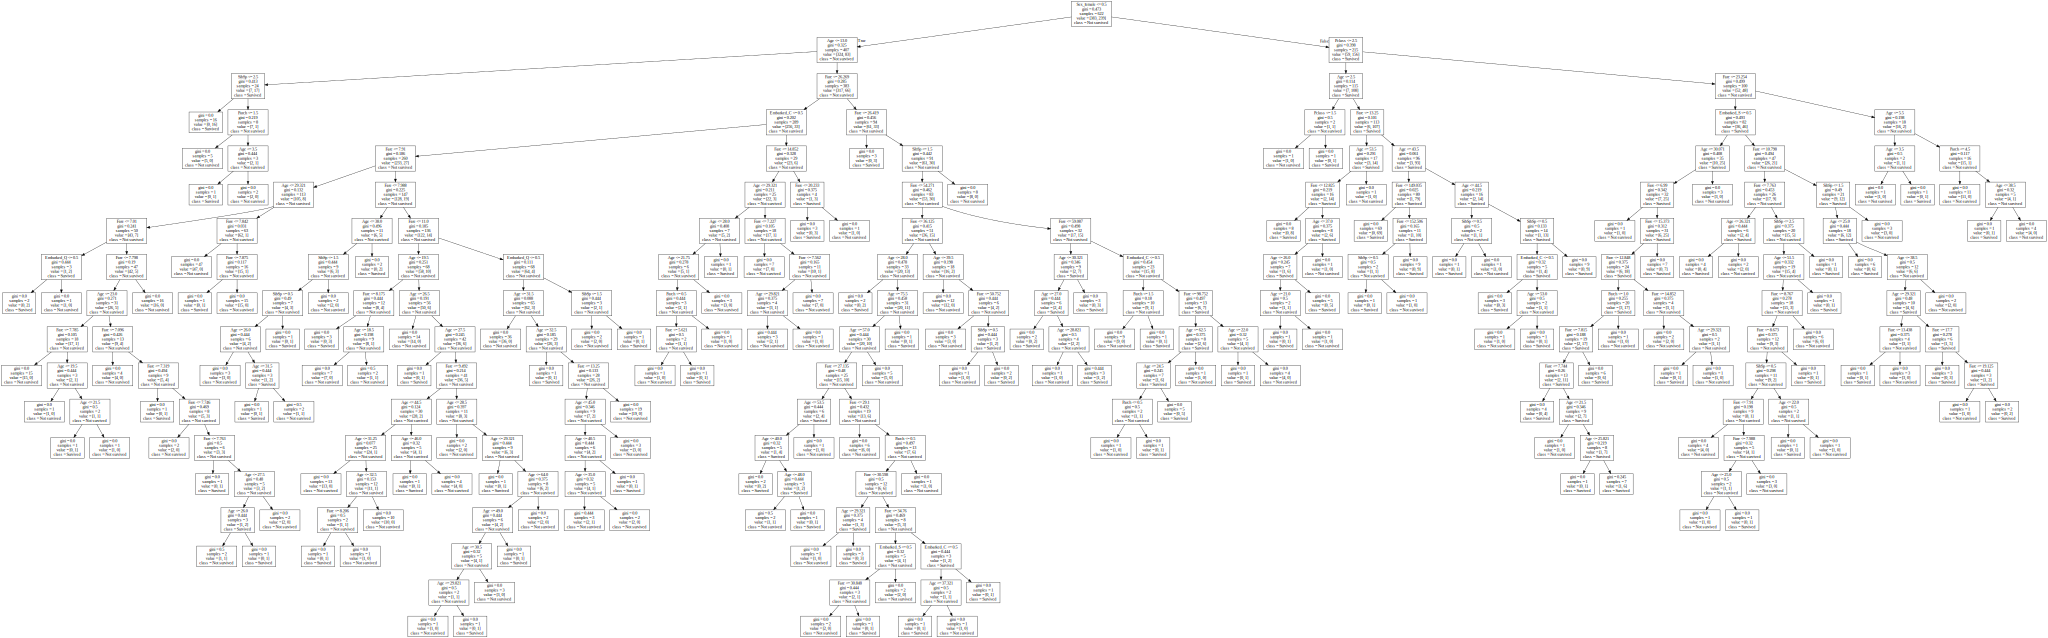

In [77]:
# In newer versions of sklearn (from 0.21) we can use sklearn.tree.plot_tree or export_text
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf_dt, out_file=None,
                           feature_names=train_df_num.drop(["PassengerId","Survived"], axis=1).columns,
                           class_names=['Not survived','Survived'], label='all')
graph = graphviz.Source(dot_data)
graph
# Value = [elements category 1 (Not Survived), elements category 2 (Survived)] --> addition=samples
# class -> class with greatest number of samples
# gini = 0 --> all the elements belong to one class
# gini = 0.5 --> elements even distributed among classes (50% Survived, 50% Not Survived, in our example)
# Always chooses the variable with the lowest gini in the root. And then the lowest of the rest of variables in the next level.
# 1 - (((383/622)^2) + ((239/622)^2)) = 0.473

# Predictions in test dataset

Choose one model

In [85]:
opcion = 6

# 1: logistic regression
# 2: neural network
# 3: SVM
# 4: random forest
# 5: gradient boosting
# 6: decision tree

if opcion == 1:
    clf = clf_lr
    X_test_aux = X_test_sc
    model="lr"
if opcion == 2:
    clf = clf_nn
    X_test_aux = X_test_sc
    model="nn"
if opcion == 3:
    clf = clf_svm
    X_test_aux = X_test_sc
    model="svm"
elif opcion == 4:
    clf = clf_rf
    X_test_aux = X_test
    model="rf"
elif opcion == 5:
    clf = clf_gb
    X_test_aux = X_test
    model="gb"
elif opcion == 6:
    clf = clf_dt
    X_test_aux = X_test
    model="dt"

In [86]:
#prob_surv_test=clf.predict_proba(X_test_aux) # Returns the probability between 0 and 1
prob_surv_test=clf.predict(X_test_aux) # Returns 0 or 1

In [87]:
predictions = pd.DataFrame({"PassengerId":IDs_test,
                             "Survived":prob_surv_test})
predictions[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [88]:
predictions.shape

(418, 2)

In [89]:
version="1"
predictions.to_csv('gender_submission_'+model+'_v'+version+'.csv',index=False)

### Results:

v1
* **Regresión Logística:** 0.76076 ---> 76% de acierto (100 fallos)
* **Red Neuronal:** 0.75598 ---> 76% de acierto (102 fallos)
* **SVM:** 0.78468 ---> 78% de acierto (90 fallos)
* **Random Forest (RF):** 0.73684 ---> 74% de acierto (110 fallos)
* **Gradient Boosting (GB):** 0.78468 ---> 78% de acierto (90 fallos)
* **Decision Tree:** 0.68899 ---> 69% de acierto (130 fallos)